In [9]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as pl
from math import *
from functions_old.multi_gradient_descent import feature_scaling
from functions.logistic_regression import * 

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def fun(x,w,b):
    return sigmoid(np.dot(w,x) + b)

def cost(x,y,w,b):
    k = 0
    for i in range(x.shape[0]):
        k += -log(sigmoid(np.dot(w,x[i]) + b))*y[i] - log(1-sigmoid(np.dot(w,x[i])+b))*(1-y[i])
    return k/x.shape[1]

def compute_gradient(x,y,w,b):
    # lambda_ = 1
    dj_dw = np.zeros(x.shape[1])
    dj_db = 0
    for i in range(x.shape[0]):
        k = fun(x[i],w,b)-y[i]
        for j in range(x.shape[1]):
            dj_dw[j] += k*x[i][j]
        dj_db += k

# for regularization
    # for j in range(x.shape[1]):
    #     dj_dw[j] = dj_dw[j]/x.shape[0] + (lambda_/x.shape[0]) * w[j]
    return dj_dw/x.shape[0],dj_db/x.shape[0]

def logistic_descent(x,y,alpha = 0.01,iter =10000 ):
    hist = []
    w = np.zeros(x.shape[1])
    b =0
    for i in range(iter):
    
        dj_dw,dj_db = compute_gradient(x,y,w,b)

        w = w - alpha*dj_dw
        b = b- alpha*dj_db
        k = cost(x,y,w,b)
        hist.append([i,k])
        if i%100 ==0:
            print(w,b,"-------------------------------- cost: ",k)
            pass
    return w,b,hist




In [11]:
file = "../data from book/BrainCancer.csv"
data = pd.read_csv(file)
data.head()


,Unnamed: 0,sex,diagnosis,loc,ki,gtv,stereo,status,time
0,1,Female,Meningioma,Infratentorial,90,6.11,SRS,0,57.64
1,2,Male,HG glioma,Supratentorial,90,19.35,SRT,1,8.98
2,3,Female,Meningioma,Infratentorial,70,7.95,SRS,0,26.46
3,4,Female,LG glioma,Supratentorial,80,7.61,SRT,1,47.80
4,5,Male,HG glioma,Supratentorial,90,5.06,SRT,1,6.30


In [12]:
ls = []
leadger = []
def categorical_data(x):
    if x not in ls:
        ls.append(x)
    return ls.index(x)

data['diagnosis'] = data['diagnosis'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['loc'] = data['loc'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['stereo'] = data['stereo'].apply(categorical_data)
leadger.append(ls)
ls =[]
data['sex'] = data['sex'].apply(categorical_data)
leadger.append(ls)
ls =[]
print(leadger)
# data
x_data = (np.array(data[['diagnosis','loc','stereo','sex','ki','gtv']]))
y_data = (np.array(data['status']))
X = feature_scaling(x_data)

[['Meningioma', 'HG glioma', 'LG glioma', nan, 'Other'], ['Infratentorial', 'Supratentorial'], ['SRS', 'SRT'], ['Female', 'Male']]


C:\Users\DINO\AppData\Local\Temp\ipykernel_17984\58001190.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


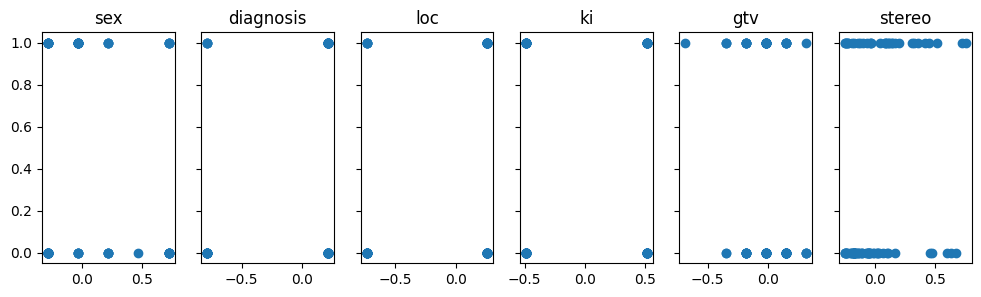

In [13]:
x_features = ['sex'	,'diagnosis','loc',	'ki',"gtv",	"stereo"]
fig,ax=pl.subplots(1, 6, figsize=(12, 3), sharey=True)
for i in range(x_data.shape[1]):
    ax[i].scatter(x_data[:,i], y_data)
    ax[i].set_title(x_features[i])
fig.show()
    

In [14]:
# per_w ,per_b,hist = gradient_descent(X,y_data,np.zeros([X.shape[1]]),0,0.01,10000,logistic=True,lambda_ =0)
per_w ,per_b,hist = logistic_descent(X,y_data,0.01,10000)
hist = np.array(hist)

[ 0.  0.  0.  0. -0.  0.] -0.0010227272727272728 -------------------------------- cost:  10.163675183812773
[ 0.02  0.04  0.05  0.03 -0.02  0.03] -0.09139293798391243 -------------------------------- cost:  9.953943408088485
[ 0.03  0.08  0.09  0.06 -0.04  0.06] -0.16181620330582824 -------------------------------- cost:  9.801586333028661
[ 0.05  0.11  0.13  0.09 -0.06  0.08] -0.21680768913311307 -------------------------------- cost:  9.686440378169149
[ 0.06  0.14  0.16  0.11 -0.09  0.11] -0.25987431003932343 -------------------------------- cost:  9.595991971796359
[ 0.07  0.18  0.2   0.14 -0.11  0.13] -0.2937236041366221 -------------------------------- cost:  9.522425865114263
[ 0.09  0.21  0.23  0.16 -0.13  0.15] -0.3204414792673238 -------------------------------- cost:  9.460797250750339
[ 0.1   0.23  0.26  0.18 -0.15  0.18] -0.3416346859537067 -------------------------------- cost:  9.407918741562755
[ 0.11  0.26  0.29  0.19 -0.17  0.2 ] -0.35854185669154975 -----------------

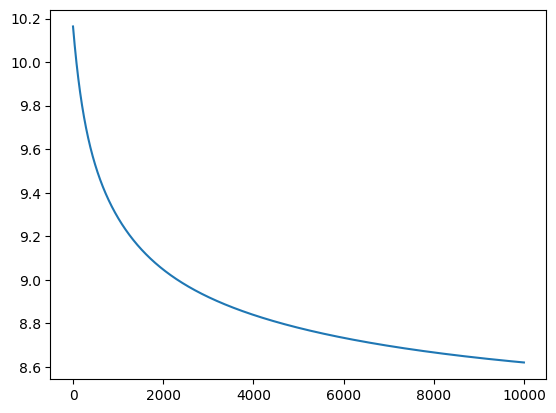

In [15]:
pl.plot(hist[:,0],hist[:,1])
pl.show()

In [18]:
print(compute_gradient(x_data,y_data,per_w,per_b))
print(compute_gradient_matrix(x_data,y_data,per_w,per_b,logistic=True))

(array([-0.  , -0.  ,  0.  , -0.  ,  0.01, -0.  ]), 0.00023474356856280606)
(0.00023474356856281742, array([[-0.  ],
       [-0.  ],
       [ 0.  ],
       [-0.  ],
       [ 0.01],
       [-0.  ]]))
